# ![](https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png) PCA Lab II: Airports
Week 7 | Lab 2.4

## Introduction

> ***Note:*** _This should be a solo exercise (though as always do discuss!)_.

You've conducted principal component analysis on numerous datasets by this point and you're well on your way to adding more complex methods to your toolbox. We're going to look back at the airport delays data from the last lab and dive a little deeper - conducting a k-means clustering, after finding the principal components of the data.

Here's the case: 

You're working for the FAA and want to understand the nature of flight delays. Looking at the [operations data](./assets/datasets/airport_operations.csv) for various airports, you want to understand what components are most important for each airport so that the FAA can target and assess poor performing airports. Your task is to first conduct a PCA on this data and second perform a k-means clustering analysis to understand the principal components - the clusters - and how they interact!

## Exercise

#### Requirements

- Import the data
- Perform a Principal Component Analysis to determine which components are most significant in relation to flight delays.
- Graph your PCA results to better understand the distribution of the principal components
- Perform k-means clustering on and graph it against the principal components
- Create a write-up of your findings; for the technical team members make sure to comment your process, and for the non-technical team members, draft a brief report to outline why your findings are significant.

Just as in a real life scenario, the data and your analysis will not always be clear cut. While you may be wondering when you've succeeded in solving the problem, we're looking for your best recommendations based on the available data. Work through the process until you and your teammate have enough information to provide an in-depth analysis.

**Bonus:**
- Repeat your analysis on subsets of the data to understand deeper insights into the behavior of flight delays. For instance, instead of looking at all of the data, subset your analysis to look at just delay or arrival metrics. 

#### Deliverable

Your finished product will be a Jupyter Notebook containing your analysis, which will include;

- Your solution code
- A brief write-up on your finds related to airport delays 
- Recommendations for analytical procedures for the datasets

If you don't finish in time, that's ok! Complete the assignment as additional practice outside of class. Remember, this lab is a valuable opportunity to refine the skills you'll need to tackle your project!

In [1]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
import numpy as np
import math
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
from sklearn.cluster import KMeans
from sklearn import metrics

%matplotlib inline

## Step 1: Setup the Data

In [2]:
# airport_operations dataset located at  assets/datasets/airport_operations.csv
df = pd.read_csv('assets/datasets/airport_operations.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 841 entries, 0 to 840
Data columns (total 15 columns):
airport                               841 non-null object
year                                  841 non-null int64
departures for metric computation     841 non-null int64
arrivals for metric computation       841 non-null int64
percent on-time gate departures       841 non-null float64
percent on-time airport departures    841 non-null float64
percent on-time gate arrivals         841 non-null float64
average_gate_departure_delay          841 non-null float64
average_taxi_out_time                 841 non-null float64
average taxi out delay                841 non-null float64
average airport departure delay       841 non-null float64
average airborne delay                841 non-null float64
average taxi in delay                 841 non-null float64
average block delay                   841 non-null float64
average gate arrival delay            841 non-null float64
dtypes: float64(1

## Step 2: Explore the Data

Next - Let's plot! You can use any plotting library of your choice, but be sure to explore all of the data.

## Step 3: Define the Variables

Next, let's define the x and y variables: Airport is going to be our "y" variable

In [43]:
y = df.airport
X = df.ix[:,2:]

## Step 4: Covariance Matrix

Then, standardize the x variable for analysis

In [44]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
Xs = ss.fit_transform(X)

Next, create the covariance matrix from the standardized x-values and decompose these values to find the eigenvalues and eigenvectors

In [45]:
Xs_corr = np.corrcoef(Xs.T)

# Step 5: Eigenpairs

Then, check your eigenvalues and eigenvectors:

In [46]:
eig_vals, eig_vecs = np.linalg.eig(Xs_corr)
print("Eigenvalues:")
print(eig_vals)
print("Eigenvectors:")
print(eig_vecs[:2])

Eigenvalues:
[  6.42789365e+00   4.29522935e+00   8.45162702e-01   5.10781087e-01
   4.67549984e-01   1.67585352e-01   1.20230770e-01   8.74711296e-02
   6.41326357e-02   1.02376485e-02   2.85657161e-03   1.66784999e-04
   7.02331392e-04]
Eigenvectors:
[[ 0.11553416 -0.41406599 -0.39997541 -0.14438624  0.18881236 -0.28942757
   0.05587773 -0.08746326  0.03560702  0.02107121 -0.01298865 -0.70788281
  -0.03470292]
 [ 0.11511736 -0.41374577 -0.40199281 -0.14693075  0.18696185 -0.29009633
   0.06017015 -0.10017047  0.03508274  0.03138682  0.01012035  0.70416949
   0.03791241]]


To find the principal componants, find the eigenpairs, and sort them from highest to lowest. 

In [47]:
# Showing just the first two principal components - eigenvalues and eigenvectors
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
eig_pairs.sort()
eig_pairs.reverse()
for i in eig_pairs[:2]:
    print(i[0],i[1])

(6.4278936548611849, array([ 0.11553416,  0.11511736, -0.31669237, -0.37664842, -0.32085275,
        0.34189399,  0.20309802,  0.17744596,  0.38371283,  0.26401921,
        0.11657517,  0.29066756,  0.35163734]))
(4.2952293485832405, array([-0.41406599, -0.41374577, -0.25078166, -0.07512682, -0.25796205,
        0.2084105 , -0.35458431, -0.36699971,  0.04013972, -0.12157143,
       -0.40414551, -0.09144017,  0.17419652]))


## Step 6: Explained Variance

Now, calculate the explained variance and the Cumulative explained variance

In [48]:
print(eig_vals/sum(eig_vals))

[  4.94453358e-01   3.30402258e-01   6.50125156e-02   3.92908528e-02
   3.59653834e-02   1.28911809e-02   9.24852076e-03   6.72854843e-03
   4.93327967e-03   7.87511425e-04   2.19736278e-04   1.28296153e-05
   5.40254917e-05]


In [49]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative explained variance:")
print(cum_var_exp)

Cumulative explained variance:
[ 49.44533581  82.48556156  88.98681312  92.91589841  96.51243674
  97.80155483  98.72640691  99.39926175  99.89258972  99.97134086
  99.99331449  99.99871704 100.        ]


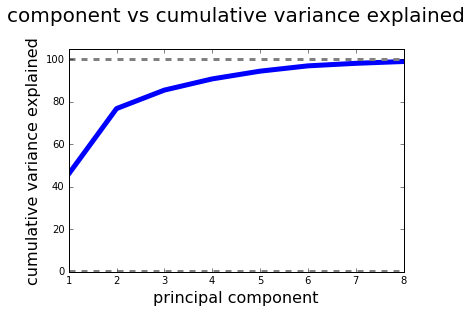

In [34]:
plt.plot(range(1,9), cum_var_exp[0:8], lw=5)
plt.axhline(y=0, linewidth=5, color='grey', ls='dashed')
plt.axhline(y=100, linewidth=3, color='grey', ls='dashed')
ax = plt.gca()
ax.set_xlim([1,8])
ax.set_ylim([0,105])
ax.set_ylabel('cumulative variance explained', fontsize=16)
ax.set_xlabel('principal component', fontsize=16) 
ax.set_title('component vs cumulative variance explained\n', fontsize=20)
plt.show()

** What does the explained variance tell us?**: Here, we can see that 81.77% of the behavior can be explained by the first two principal components

## Step 7: Perform the PCA

Instead of creating the projection matrix, we're going to use Scikit's built in function. Now that we have discovered the principal componants, we have an educated idea on how many componants to pass to the function. 

In [50]:
from sklearn.decomposition import PCA

# select n_components for the number of principal components you wish to use
pca = PCA(n_components=3)

pca.fit(Xs)
print("--")
print("The eigenvalues give the relative explained variance of each principal components:", pca.explained_variance_)
print("--")
print("This value as a ratio of the total variance:", pca.explained_variance_ratio_)
print("--")
print("The two vectors describing the principal components:")
print(pca.components_)
print("--")
X_reduced=pca.transform(Xs)

--
('The eigenvalues give the relative explained variance of each principal components:', array([ 6.42789365,  4.29522935,  0.8451627 ]))
--
('This value as a ratio of the total variance:', array([ 0.49445336,  0.33040226,  0.06501252]))
--
The two vectors describing the principal components:
[[ 0.11553416  0.11511736 -0.31669237 -0.37664842 -0.32085275  0.34189399
   0.20309802  0.17744596  0.38371283  0.26401921  0.11657517  0.29066756
   0.35163734]
 [-0.41406599 -0.41374577 -0.25078166 -0.07512682 -0.25796205  0.2084105
  -0.35458431 -0.36699971  0.04013972 -0.12157143 -0.40414551 -0.09144017
   0.17419652]
 [-0.39997541 -0.40199281  0.25417326  0.09065332  0.03115131 -0.19754237
   0.30469542  0.3513829  -0.03910755  0.43809552 -0.25975821  0.29707714
   0.01051214]]
--


Create a dataframe from the PCA results

In [54]:
Xdf = pd.DataFrame(X_reduced,columns=['PC1','PC2','PC3'])

Now, create a new dataframe that uses the airport and year from the original set and join the PCA results with it to form a new set

In [56]:
airport = pd.concat([df.ix[:,:2],Xdf],axis=1)

In [93]:
airport.head(2)

,airport,year,PC1,PC2,PC3
0,ABQ,2004,-2.104891,0.769690,0.069992
1,ABQ,2005,-2.501786,0.700678,-0.012675


Next, graph the results onto the new feature space

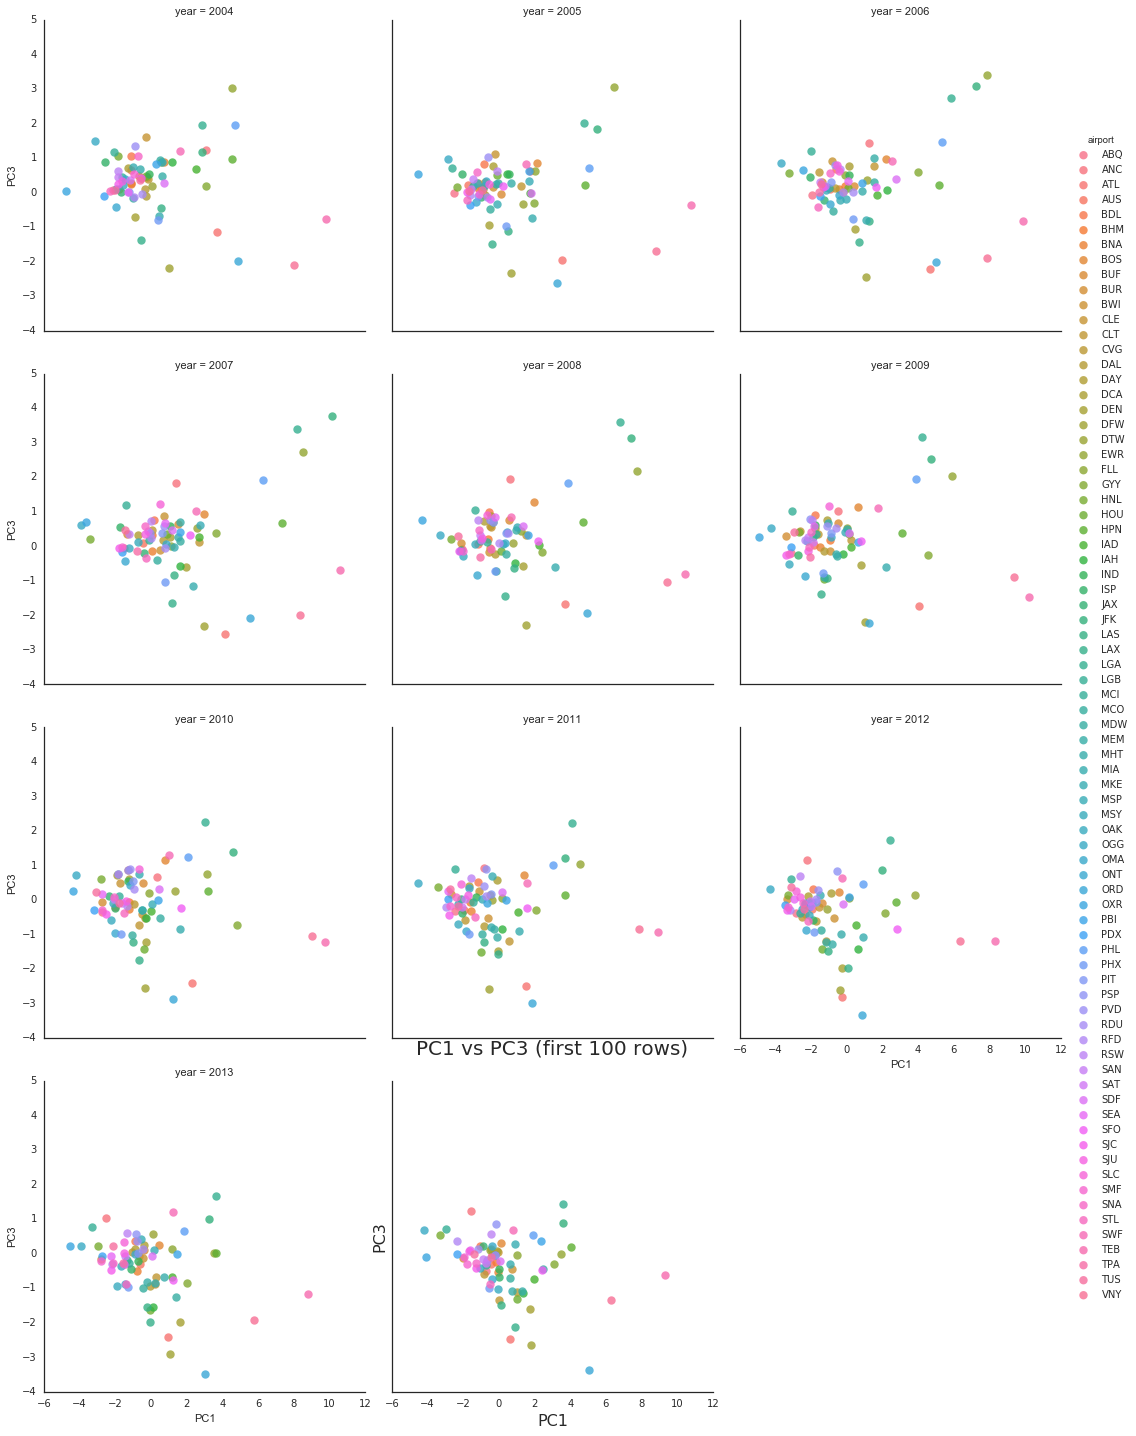

In [97]:
import seaborn as sns

sns.set_style('white')

# PC1 vs PC2
sns.lmplot('PC1', 'PC3', data=airport, hue='airport',col='year',col_wrap=3,fit_reg=False, scatter_kws={'s':70})
plt.xlabel('PC1', fontsize=16)
plt.ylabel('PC3', fontsize=16)

 
plt.title('PC1 vs PC3 (first 100 rows)\n', fontsize=20)
plt.show()

**What does the graph tell us?**

## Step 8: Cluster with K-Means

Set up the k-means clustering analysis. Use the graph from above to derive "k"

Compute the labels and centroids

Compute the Silhoutte Score

Lastly, plot the new two-dimensional data along with their cluster assignments: 